In [1]:
from datasets import load_dataset
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

file_path = "../data/exc_mistral-openorca_prep_1.csv"

train_file = file_path + "_train.jsonl"
val_file = file_path + "_val.jsonl"

train_dataset = load_dataset('json', data_files=train_file, split='train')
eval_dataset = load_dataset('json', data_files=val_file, split='train')

In [6]:
def formatting_func(example):
    text = f"### Generate Scifi: {example['input']} ### Output:{example['output']}"
    return text

In [7]:
base_model_id = "mistralai/Mistral-7B-v0.1"
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

def generate_and_tokenize_prompt(prompt):
    return tokenizer(formatting_func(prompt))

In [8]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)

Map:   0%|          | 0/6552 [00:00<?, ? examples/s]

Map:   0%|          | 0/1638 [00:00<?, ? examples/s]

8190


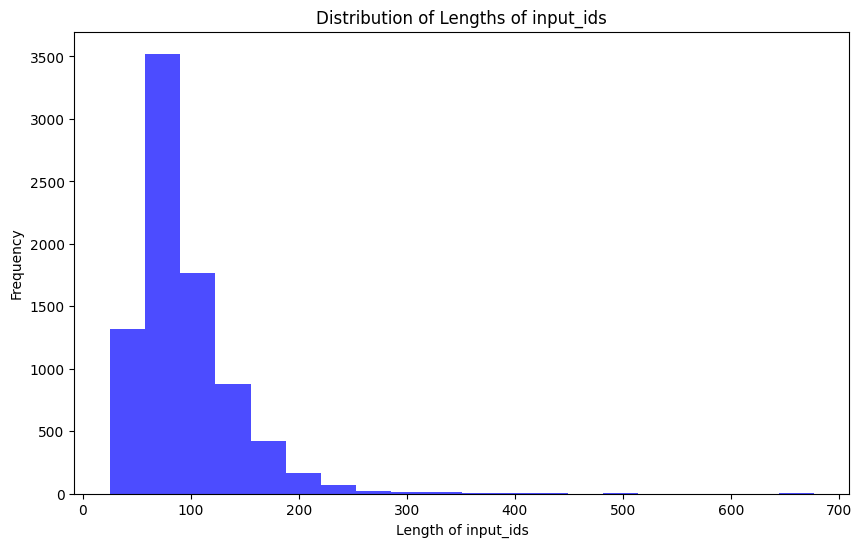

In [9]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
    lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)